# 📈 Time-height graph

In [17]:
from herbie import FastHerbie, Herbie
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import xarray as xr

In [13]:
%%time
# User FastHerbie to get many Herbie objects
FH = FastHerbie(DATES=["2024-05-11"], product="prs", fxx=range(0, 19, 3))
# FH.inventory(r"(?:HGT|TMP):1*[5-9,0][0,5]0 mb")

CPU times: user 581 ms, sys: 67.7 ms, total: 649 ms
Wall time: 860 ms


In [14]:
# points of interest to pick out of the grid
points = pd.DataFrame({"latitude": [40.76], "longitude": [-111.89]})
points

,latitude,longitude
0,40.76,-111.89


In [15]:
%%time
# Get data grid for variables of interest
# Get data at specific points
# Combine into a new dataset
a = [
    i.xarray(r"(?:HGT|TMP):1*[5-9,0][0,5]0 mb").herbie.pick_points(points)
    for i in FH.file_exists
]
ds = xr.combine_nested(a, concat_dim="valid_time")

CPU times: user 14.4 s, sys: 1.66 s, total: 16.1 s
Wall time: 2min 5s


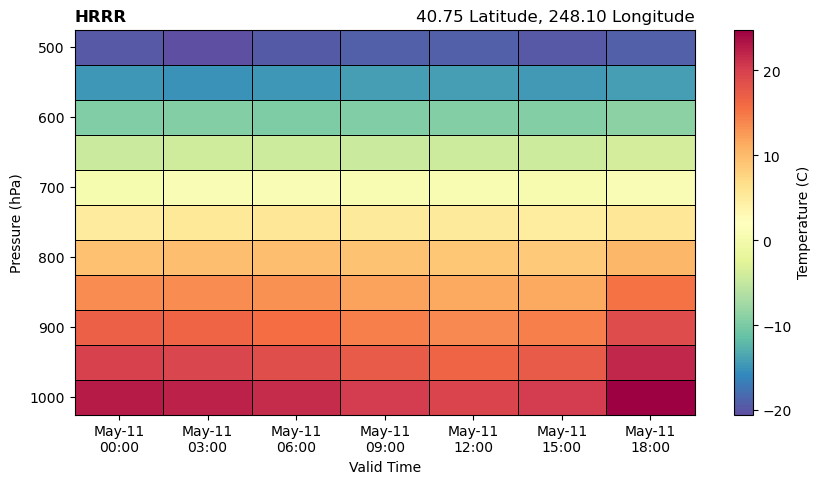

In [37]:
# Select the point I want
dsp = ds.isel(point=0)

plt.figure(figsize=[10, 5])
ax = plt.gca()
art = ax.pcolormesh(
    dsp.valid_time,
    dsp.isobaricInhPa,
    dsp.t.transpose() - 273.15,
    edgecolor="k",
    linewidth=0.5,
    cmap="Spectral_r",
)
plt.colorbar(art, ax=ax, label="Temperature (C)")
ax.invert_yaxis()
ax.set_ylabel("Pressure (hPa)")
ax.set_xlabel("Valid Time")
ax.set_title("HRRR", fontweight="bold", loc="left")
ax.set_title(
    f"{dsp.latitude.values:.2f} Latitude, {dsp.longitude.values:.2f} Longitude",
    loc="right",
)

ax.xaxis.set_major_locator(mdates.HourLocator(range(0, 24, 3)))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d\n%H:%M"))

In [47]:
%%time
# This crashes my kernel!!!
FH.xarray(r"(?:HGT|TMP):\d+00 mb:", remove_grib=False)

: 